## Команда 
* Семенова Наталья (код в R Stylo) 
* Анастасия Кузнецова (PyDelta, описание задачи, методов)
* Ксения Самойленко (описание задачи, методов, код ревью)

## Список источников


1. Источники текстов Н.И. Новикова и А.Н. Радищева "Путешествия из Петербурга в Москву" -- lib.ru (Библиотека Владимира Мошкова);
2. [Стихи](http://rupoem.ru/radischev/all.aspx)
 А.Н. Радищева.

## Описание задачи

Стили написания текстов различными авторами обладают своими особенностями: лексиконом, свойственным только этому автору, количеством употребляемых слов, синтаксическими конструкциями и др. Оказывается, что 100 -- 200 наиболее употребляемых автором слов уже сильно различаются друг от друга, поэтому являются важным показателем в определении авторства (Evert, Proisl, 2017). Все это открывает возможности для статистического исследования текстов и применения стилометрии -- метода определения авторства текста на основе статистически выделяемых признаков.

Наша задача заключается в том, чтобы определить, дествительно ли Н. И. Новиков, который официально считается автором "Путешествие И в Т" является таковым, либо его, все-таки, написал А. Н. Радищев. 

## Меотды решения задачи определения авторства

Для решения задачи определения авторства были разработаны разные метрики, в том числе индекс Delta, который основывается на измерении расстояния между текстами.  Дельта -- расстояние между векторными представлениями текстов в многомерном пространстве (Argamon 2008). Где слово -- одна из осей этого пространства.


Тексты представляются в виде "мешка слов", где каждый вектор содержит относительные частоты слова по всем документам корпуса (могут быть использованы различные варианты подсчета частот).

Могут использоваться также разные варианты подсчета расстояния:
1. Manhattan Distance
2. Евклидово расстояние
3. Косинусная мера близости 

На основе мер расстояния и выбранного метода нормализации выделяют разные Дельты:
1. Manhattan Distance + нормализация по относительным частотам слов = Линейная Дельта
2. Евклидово расстояние + нормализация по $Z$-score = Квадратичная Дельта
(частоты слов независимы друг от друга).
Существуют также 
3. Делта Эдера (Eder's Delta), которая уменшьает веса редко встречающихся слов и другие вариации. 

В основе всех методов лежит построение $n$-мерной матрицы попарного постчитанного растояния между текстами корпуса.  Затем тексты кластеризуются на основе матрицы расстояний. Например,  с помощью иерархической кластеризации и построением дендрораммы.


## Анализ автоства с помощью библиотеки PyDelta

In [64]:
import delta
import matplotlib.pyplot as plt

__Первым шагом__ читаем корпус и получаем матрицу признаков с частотами слов.

In [54]:
raw_corpus = delta.Corpus('/home/nst/mount/data/linguistics_hse/digital_humanities/corpus/', 
                         delta.FeatureGenerator(lower_case= True))

/home/nst/anaconda3/lib/python3.6/site-packages/delta/corpus.py:323: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.metadata = metadata


In [55]:
raw_corpus

,и,в,не,что,на,я,его,с,то,но,...,одарен,огурцы,огромный,огромность,огромности,огромном,огромной,огромное,огорожены,яству
Новиков_Кошелек,261.0,190.0,167.0,117.0,30.0,149.0,23.0,53.0,57.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Новиков_Пословицы,575.0,342.0,250.0,221.0,159.0,91.0,204.0,118.0,63.0,123.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Новиков_Путешествие_И_в_Т,77.0,35.0,29.0,41.0,19.0,30.0,8.0,6.0,4.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Новиков_Трутень,278.0,150.0,196.0,145.0,52.0,118.0,34.0,50.0,54.0,47.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Радищев_Журналы,698.0,475.0,318.0,260.0,251.0,53.0,88.0,118.0,167.0,125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Радищев_Путешествие_из_Петербурга,1705.0,1517.0,980.0,578.0,711.0,462.0,455.0,320.0,320.0,277.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
Радищев_Стихи,164.0,222.0,112.0,50.0,68.0,67.0,19.0,48.0,28.0,11.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [56]:
raw_corpus.shape

(7, 27772)

Мы получили матрицу из 7-ми произведений с 27772 признаками. Не все из них значимые, поэтому далее в матрице относительных частот оставим только 5000 наиболее частотных слов.

Подсчет относительных частот нужен для компенсации разинцы длин текстов. 

In [103]:
freq5000 = raw_corpus.get_mfw_table(5000)

/home/nst/anaconda3/lib/python3.6/site-packages/delta/corpus.py:323: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.metadata = metadata


In [104]:
freq5000

,и,в,не,что,на,я,его,с,то,но,...,кстати,деревнях,радостным,крылие,действительно,бесчестия,понимает,поносить,крылех,понравилось
Новиков_Кошелек,0.037543,0.027330,0.024022,0.016830,0.004315,0.021433,0.003308,0.007624,0.008199,0.008199,...,0.000144,0.000000,0.000000,0.000000,0.000000,0.000288,0.000144,0.000144,0.000000,0.000432
Новиков_Пословицы,0.041513,0.024691,0.018049,0.015956,0.011479,0.006570,0.014728,0.008519,0.004548,0.008880,...,0.000072,0.000000,0.000072,0.000000,0.000000,0.000000,0.000144,0.000000,0.000000,0.000000
Новиков_Путешествие_И_в_Т,0.044253,0.020115,0.016667,0.023563,0.010920,0.017241,0.004598,0.003448,0.002299,0.004023,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Новиков_Трутень,0.038239,0.020633,0.026960,0.019945,0.007153,0.016231,0.004677,0.006878,0.007428,0.006465,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Радищев_Журналы,0.043231,0.029419,0.019695,0.016103,0.015546,0.003283,0.005450,0.007308,0.010343,0.007742,...,0.000000,0.000062,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Радищев_Путешествие_из_Петербурга,0.033285,0.029615,0.019132,0.011284,0.013880,0.009019,0.008883,0.006247,0.006247,0.005408,...,0.000020,0.000039,0.000000,0.000059,0.000059,0.000020,0.000000,0.000039,0.000059,0.000000
Радищев_Стихи,0.018106,0.024509,0.012365,0.005520,0.007507,0.007397,0.002098,0.005299,0.003091,0.001214,...,0.000000,0.000000,0.000221,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Далее посчитаем расстояние между словами с помощью косинусной дельты и визуализируем кластеры.

In [105]:
distances = delta.functions.cosine_delta(freq5000)

/home/nst/anaconda3/lib/python3.6/site-packages/delta/corpus.py:323: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.metadata = metadata
/home/nst/anaconda3/lib/python3.6/site-packages/delta/deltas.py:627: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.metadata = Metadata(metadata, **kwargs)
/home/nst/anaconda3/lib/python3.6/site-packages/delta/deltas.py:622: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.metadata = copy_from.metadata


In [106]:
clustering = delta.Clustering(distances)

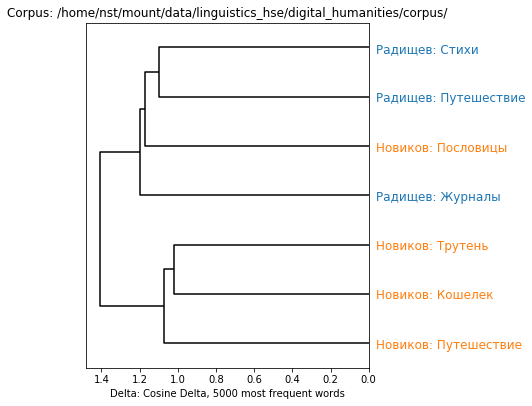

In [107]:
plt.figure(figsize=(7,6))
delta.Dendrogram(clustering).show()

In [108]:
clusters = clustering.fclustering()
print(clusters.describe())

2 clusters of 7 documents (ground truth: 2 groups):
{1: ['Новиков: Кошелек', 'Новиков: Путешествие', 'Новиков: Трутень'],
 2: ['Новиков: Пословицы', 'Радищев: Журналы', 'Радищев: Путешествие',
     'Радищев: Стихи']}



На дендрограме видно, что произведения Н.И. Новикова: "Трутень", "Кошелек" и "Путешествие И в Т", которое ему приписывают оказались в одном большом кластере и только "Пословицы российские" оказались в большом кластере с произведениями А. Н. Радищева.

Оценив результаты кластеризации по стандартным метрикам, можно сказать, что кластеризация оказалась довольно успешной, несмотря на то, что, например, Adjusted Rand Index ниже 50%. Это можно объяснить маленьким размером корпуса, однако для 7-ми текстов результат, на наш взгляд, очень хороший. 

Можем сделать __вывод__, что "Путешествие И в Т" было все-таки написано Н.И. Новиковым.

In [109]:
clusters.evaluate()

Cluster Errors         1.000000
Adjusted Rand Index    0.416667
Homogeneity            0.529462
Completeness           0.529462
V Measure              0.529462
Purity                 0.857143
Entropy                0.463587
dtype: float64

## Литература
_Evert, Stefan, Proisl, Thomas_. Understanding and explaining Delta measures for authorship attribution, Digital Scholarship in the Humanities, Vol. 32, Supplement 2, 2017,
[URL](https://academic.oup.com/dsh/article/32/suppl_2/ii4/3865676).